# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
## Identify url and units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [5]:
# Create lists to hold data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []

# Loop through the list of cities and perform a request for data on each
print("----------------------------")
print(f"Beginning Data Retrieval")
print("----------------------------")

record = 0 
set_number = 1 

for city in cities:   

    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record >= 50:
            record = 1 
            set_number = set_number + 1
        else: 
            record = record + 1 

        print(f"Processing Record {record} of Set {set_number} | {city}.")
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
        time.sleep(1.01)
        
print("----------------------------")
print(f"Data Retrieval Complete")
print("----------------------------")    

----------------------------
Beginning Data Retrieval
----------------------------
City not found. Skipping...
Processing Record 1 of Set 1 | castro.
Processing Record 2 of Set 1 | busselton.
Processing Record 3 of Set 1 | laguna.
Processing Record 4 of Set 1 | mataura.
Processing Record 5 of Set 1 | atuona.
City not found. Skipping...
Processing Record 6 of Set 1 | bentiu.
Processing Record 7 of Set 1 | tocopilla.
Processing Record 8 of Set 1 | barrow.
Processing Record 9 of Set 1 | puerto ayora.
Processing Record 10 of Set 1 | albany.
Processing Record 11 of Set 1 | bangassou.
Processing Record 12 of Set 1 | yellowknife.
Processing Record 13 of Set 1 | dingle.
City not found. Skipping...
Processing Record 14 of Set 1 | saint-philippe.
Processing Record 15 of Set 1 | nanortalik.
Processing Record 16 of Set 1 | cidreira.
City not found. Skipping...
Processing Record 17 of Set 1 | ancud.
Processing Record 18 of Set 1 | rikitea.
Processing Record 19 of Set 1 | punta arenas.
Processing Re

Processing Record 33 of Set 4 | herre.
Processing Record 34 of Set 4 | belyy yar.
Processing Record 35 of Set 4 | pasco.
Processing Record 36 of Set 4 | barra do bugres.
Processing Record 37 of Set 4 | bennettsville.
Processing Record 38 of Set 4 | saint-denis.
Processing Record 39 of Set 4 | kuala terengganu.
Processing Record 40 of Set 4 | qaanaaq.
Processing Record 41 of Set 4 | pevek.
Processing Record 42 of Set 4 | faanui.
City not found. Skipping...
Processing Record 43 of Set 4 | manokwari.
Processing Record 44 of Set 4 | byron bay.
Processing Record 45 of Set 4 | tak.
Processing Record 46 of Set 4 | norman wells.
Processing Record 47 of Set 4 | yining.
Processing Record 48 of Set 4 | tucuman.
Processing Record 49 of Set 4 | kochubey.
Processing Record 50 of Set 4 | weligama.
City not found. Skipping...
Processing Record 1 of Set 5 | dikson.
Processing Record 2 of Set 5 | prince rupert.
Processing Record 3 of Set 5 | chau doc.
Processing Record 4 of Set 5 | barvinkove.
Processin

Processing Record 18 of Set 8 | iqaluit.
Processing Record 19 of Set 8 | faya.
Processing Record 20 of Set 8 | jaisalmer.
Processing Record 21 of Set 8 | el reno.
Processing Record 22 of Set 8 | tomatlan.
Processing Record 23 of Set 8 | auki.
Processing Record 24 of Set 8 | paraipaba.
Processing Record 25 of Set 8 | grindavik.
Processing Record 26 of Set 8 | faqirwali.
City not found. Skipping...
Processing Record 27 of Set 8 | krasnoselkup.
Processing Record 28 of Set 8 | kemijarvi.
Processing Record 29 of Set 8 | limbe.
Processing Record 30 of Set 8 | itaituba.
Processing Record 31 of Set 8 | tshikapa.
Processing Record 32 of Set 8 | neuquen.
Processing Record 33 of Set 8 | omboue.
Processing Record 34 of Set 8 | lagoa.
City not found. Skipping...
Processing Record 35 of Set 8 | dharchula.
Processing Record 36 of Set 8 | kipini.
Processing Record 37 of Set 8 | paka.
Processing Record 38 of Set 8 | katherine.
Processing Record 39 of Set 8 | ambulu.
Processing Record 40 of Set 8 | cara

Processing Record 47 of Set 11 | atambua.
Processing Record 48 of Set 11 | raga.
Processing Record 49 of Set 11 | yanam.
Processing Record 50 of Set 11 | quatre cocos.
Processing Record 1 of Set 12 | kalat.
Processing Record 2 of Set 12 | cumaral.
Processing Record 3 of Set 12 | mnogovershinnyy.
Processing Record 4 of Set 12 | bandarbeyla.
Processing Record 5 of Set 12 | shenjiamen.
Processing Record 6 of Set 12 | sangar.
Processing Record 7 of Set 12 | bamenda.
Processing Record 8 of Set 12 | twentynine palms.
Processing Record 9 of Set 12 | rio gallegos.
Processing Record 10 of Set 12 | humaita.
Processing Record 11 of Set 12 | marinette.
Processing Record 12 of Set 12 | port hardy.
Processing Record 13 of Set 12 | zyryanka.
Processing Record 14 of Set 12 | canico.
Processing Record 15 of Set 12 | korsakov.
Processing Record 16 of Set 12 | jutai.
Processing Record 17 of Set 12 | shadrinsk.
Processing Record 18 of Set 12 | malartic.
Processing Record 19 of Set 12 | kijang.
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Create dataframe
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng, 
    "Max Temp": max_temp, 
    "Humidity": humidity, 
    "Cloudiness": cloudiness, 
    "Wind Speed": windspeed, 
    "Country": country, 
    "Date": date
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,62.85,72,30,2.66,BR,1618017526
1,Busselton,-33.6500,115.3333,61.00,78,0,8.99,AU,1618017527
2,Laguna,38.4210,-121.4238,72.00,40,1,11.50,US,1618017408
3,Mataura,-46.1927,168.8643,55.00,89,100,1.01,NZ,1618017530
4,Atuona,-9.8000,-139.0333,80.49,77,17,13.49,PF,1618017354
...,...,...,...,...,...,...,...,...,...
570,Cayenne,4.9333,-52.3333,79.00,94,0,4.36,GF,1618018331
571,Tuatapere,-46.1333,167.6833,55.00,91,100,1.79,NZ,1618018333
572,Vidim,56.4088,103.1106,23.85,61,78,7.11,RU,1618018334
573,Mariehamn,60.0973,19.9348,37.40,87,90,11.50,AX,1618018335


In [7]:
# Describe data
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,575.000000,575.000000,575.000000,575.000000,575.000000,575.000000,5.750000e+02
mean,21.689971,20.787449,56.178991,71.492174,55.580870,8.150643,1.618018e+09
std,33.642171,89.642137,23.566336,21.342965,39.675952,5.379468,2.448230e+02
min,-54.800000,-175.200000,-14.800000,1.000000,0.000000,0.720000,1.618017e+09
25%,-6.319450,-58.193250,37.470000,62.000000,14.000000,4.015000,1.618018e+09
50%,27.976900,24.666700,60.800000,77.000000,75.000000,6.910000,1.618018e+09
75%,51.008250,101.731400,76.920000,87.000000,98.000000,11.180000,1.618018e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,30.490000,1.618018e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

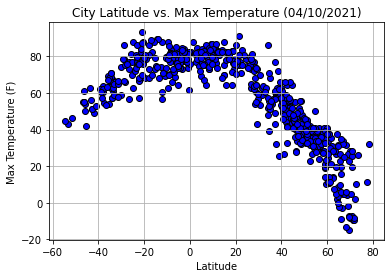

In [8]:
# Convert time into date format
converted_weather_data_df = pd.to_datetime(weather_data['Date'], unit='s').dt.strftime('%m/%d/%Y')

# Generate and format scatter plot
x_axis = weather_data["Lat"]
data = weather_data["Max Temp"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Max Temperature ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

# Save figure 
#plt.savefig("../Images/Lat_temp.png")


## Latitude vs. Humidity Plot

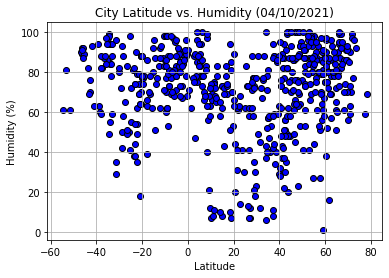

In [9]:
# Generate and format scatter plot
x_axis = weather_data["Lat"]
data = weather_data["Humidity"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Humidity ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

# Save figure 
#plt.savefig("../Images/Humidity.png")

## Latitude vs. Cloudiness Plot

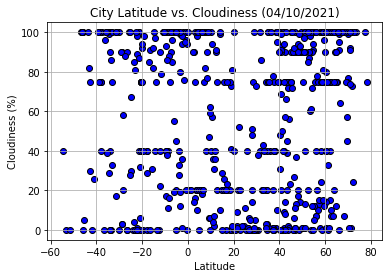

In [10]:
# Generate and format scatter plot
x_axis = weather_data["Lat"]
data = weather_data["Cloudiness"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Cloudiness ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

# Save figure 
#plt.savefig("../Images/Cloudiness.png")

## Latitude vs. Wind Speed Plot

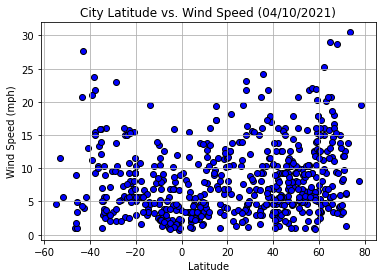

In [11]:
# Generate and format scatter plot
x_axis = weather_data["Lat"]
data = weather_data["Wind Speed"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")
plt.title(f"City Latitude vs. Wind Speed ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

# Save figure 
#plt.savefig("../Images/WindSpeed.png")

## Linear Regression

In [22]:
# Create northern hemisphere dataframe
northern_df = weather_data[weather_data["Lat"] >= 0]

# Create southern hemisphere dataframe
southern_df = weather_data[weather_data["Lat"] < 0] 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8302313303136177


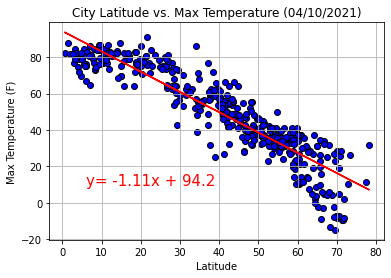

In [50]:
# Generate scatter plot
x_axis = northern_df["Lat"]
data = northern_df["Max Temp"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Max Temperature ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Print correlation and plot 
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/NorthMaxTemp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.4800627584982512


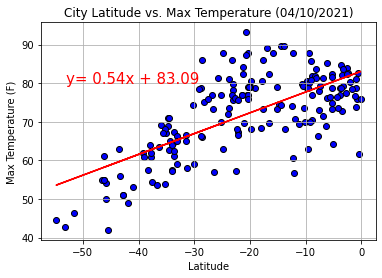

In [71]:
# Generate scatter plot
x_axis = southern_df["Lat"]
data = southern_df["Max Temp"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-53,80), fontsize = 15, color = "red")

# Format plot 
plt.title(f"City Latitude vs. Max Temperature ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Print correlation and plot
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/SouthMaxTemp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.05523221517908631


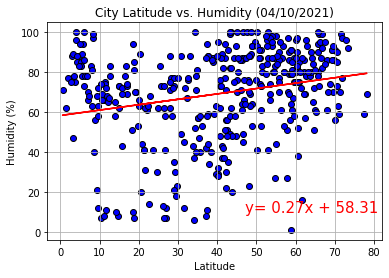

In [69]:
# Generate and format scatter plot
x_axis = northern_df["Lat"]
data = northern_df["Humidity"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (47,10), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Humidity ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Print correlation and plot
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/NorthHumidity.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.006635880218698912


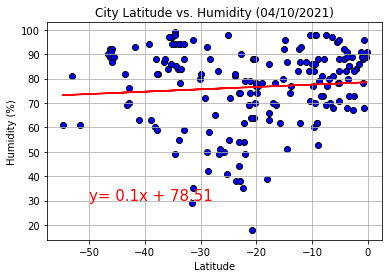

In [66]:
# Generate and format scatter plot
x_axis = southern_df["Lat"]
data = southern_df["Humidity"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize = 15, color = "red")

# Format plot 
plt.title(f"City Latitude vs. Humidity ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Print correlation and plot 
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/SouthHumidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.07346853928762194


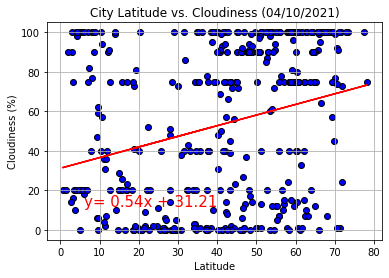

In [64]:
# Generate and format scatter plot
x_axis = northern_df["Lat"]
data = northern_df["Cloudiness"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (6,12), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Cloudiness ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Print correlation and plot
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/NorthCloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.008035432754671152


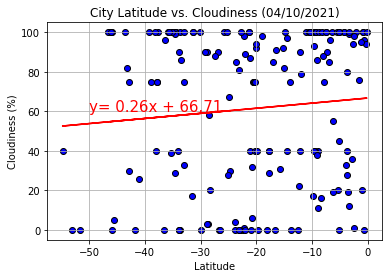

In [62]:
# Generate and format scatter plot
x_axis = southern_df["Lat"]
data = southern_df["Cloudiness"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-50,60), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Cloudiness ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Print correlation and plot
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/SouthCloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05270116215341319


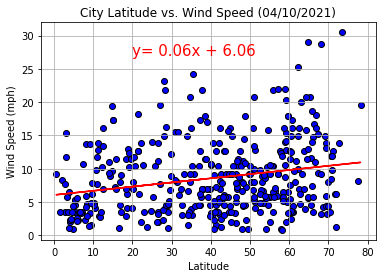

In [61]:
# Generate and format scatter plot
x_axis = northern_df["Lat"]
data = northern_df["Wind Speed"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (20,27), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Wind Speed ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Print correlation and plot 
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/NorthWindSpeed.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.084784271105042


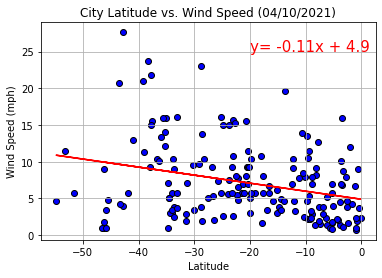

In [59]:
# Generate and format scatter plot
x_axis = southern_df["Lat"]
data = southern_df["Wind Speed"]
plt.scatter(x_axis, data, marker="o", facecolors="blue", edgecolors="black")

# Complete linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y= " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
plt.plot(x_axis, regress_values, "r-")
plt.annotate(line_eq, (-20, 25), fontsize = 15, color = "red")

# Format plot
plt.title(f"City Latitude vs. Wind Speed ({converted_weather_data_df[1]})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

# Print correlation and plot 
print(f"The r-value is: {rvalue**2}")
plt.show()

# Save figure 
#plt.savefig("../Images/SouthWindSpeed.png")